In [1]:
import pympcd
import matplotlib.pyplot as plt

In [2]:
params = pympcd.Params()
params.n = 10
params.temperature = 1.0
params.volume_size = (10, 10, 10)
params.periodicity = (1, 1, 0)
params.drag = 0.01
params.delta_t = 0.02
params.experiment = "standart"
params.algorithm = "extended"

# Create and run simulation
sim = pympcd.Simulation(params, "cpu")

Creating CPU backend (WARNING: CPU backend is not fully supported)


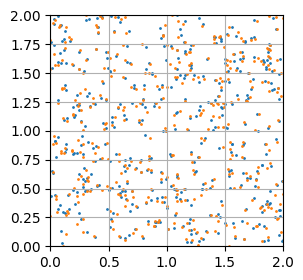

In [17]:
fig, (ax) = plt.subplots(1, 1, figsize=(3, 3))

for i in range(2):
    sim.step(1)
    pos = sim.get_particle_positions()
    ax.scatter(pos[:,0], pos[:,2], s = 1)

ax.set_xlim(0, 2)
ax.set_ylim(0, 2)
ax.grid()

In [18]:
sim.step_and_sample(1000)
density, velocity = sim.get_mean_fields()

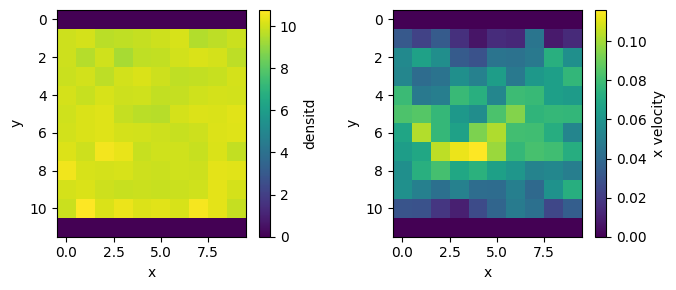

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3))

im1 = ax1.imshow(density.mean(axis=(1)).T)
cax = plt.colorbar(im1, ax=ax1)
cax.set_label("densitd")
ax1.set_ylabel('y')
ax1.set_xlabel('x');

im2 =  ax2.imshow(velocity.mean(axis=(1))[:,:,0].T)
cax = plt.colorbar(im2, ax=ax2)
cax.set_label("x velocity")
ax2.set_ylabel('y')
ax2.set_xlabel('x');

plt.tight_layout()
plt.show()

In [6]:
sim.step(1000)
sim.step_and_sample(1000)
density, velocity = sim.get_mean_fields()

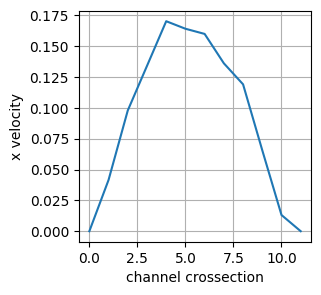

In [7]:
fig, (ax) = plt.subplots(1, 1, figsize=(3, 3))

ax.plot(velocity.mean(axis=(0,1))[:,0])
ax.grid()
ax.set_xlabel("channel crossection")
ax.set_ylabel("x velocity");

In [9]:
import math

# Calculate velocity profile
x_velocity = velocity[:,:,:,0]; 
vel_profile = x_velocity.mean(axis=(0,1))

# Simulation parameters:
L = params.volume_size[2] - 2
g = params.drag
n = params.n
dt = params.delta_t

# Viscosity measurement:
eta = L * L * n * g / (8 * vel_profile.max())

# Viscosity theoretical:
eta_theo = (1 - math.cos(120/180*math.pi)) / (6*3*dt) * (n - 1 + math.exp(-n))

print( "theoretical: ", eta_theo, ", measured:", eta ) 

theoretical:  37.500190004568566 , measured: 7.3427486


In [14]:
5*7

35

In [35]:
params.N

31680